#빅데이터 마케팅 분석 전문가 #4


##1.인공신경망

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Ubion/data/Ashopping.csv", encoding = "cp949")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [37]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [38]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [40]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

###분류예측

In [41]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [42]:
#5. 모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train) : 0.889
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.85      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



###회귀예측

In [44]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [45]:
import numpy as np

#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = df[df.이탈여부 == 0]["1회 평균매출액"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [46]:
#4. 모델링 
from sklearn.neural_network import MLPRegressor

#4-1.모델 생성
nn_reg_model = MLPRegressor(random_state = 0, alpha = 0.001, max_iter = 2000, 
                            hidden_layer_sizes = [50, 50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

Y predict value : 
 [381377.38391094 197277.89370898 203213.87761097 631170.02163835
 110525.81302818 288979.8779508    8432.01401265 152701.13753611
 135152.64742379 303497.51148875 235874.37650518 253282.11494387
 218424.92017181 237646.71277002 348328.71595336 300809.29318035
 404063.12882681 444807.97693359 212515.65375684 299135.24418369
 465597.92848873 107904.29533918 258233.25707635 358787.3296507
   4064.29779297 462633.49534593 399309.18132288 179807.11682315
 186944.84056465 209234.28213068 401090.84594678 465774.60283966
 222188.40958675 459137.75135073 223432.75656504 113524.58286733
 187268.26945841 458567.9117471  132849.46599019 712421.35577061
 348012.0394223  178505.74882617 295628.43645386 312832.53698025
 283171.02289656 375445.31719462  10024.59601894 229114.84066501
 360274.70508555 364010.30810207 219457.45169494 640729.62755891
  35512.98386133 431185.9222528  369166.6243725  231020.78298484
 350897.58983935 266919.87817753 325820.43374977 289584.98907451
 38823

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


#딥러닝


###경고문 제거

In [47]:
import warnings
warnings.filterwarnings("ignore")

##DNN(Deep learning : Deep Neural Network)

###분류예측

In [48]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7. 모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, 
                    batch_size = 64, verbose = 2)

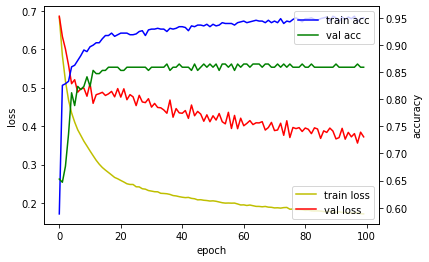

In [50]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [51]:
model.fit(X_train, Y_train, validation_split = 0.3, epochs = 10, 
                    batch_size = 64, verbose = 1)

Epoch 1/10
10/10 [==============================] - 0s 11ms/step - loss: 0.1772 - accuracy: 0.9392 - val_loss: 0.2807 - val_accuracy: 0.9016
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1771 - accuracy: 0.9443 - val_loss: 0.2900 - val_accuracy: 0.8976
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.1753 - accuracy: 0.9459 - val_loss: 0.2812 - val_accuracy: 0.8937
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1754 - accuracy: 0.9476 - val_loss: 0.2797 - val_accuracy: 0.8976
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1759 - accuracy: 0.9375 - val_loss: 0.2748 - val_accuracy: 0.8976
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1766 - accuracy: 0.9392 - val_loss: 0.2793 - val_accuracy: 0.8976
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1744 - accuracy: 0.9476 - val_loss: 0.2758 - val_accuracy: 0.8976
Epoch 8/10
10/10 [=

In [52]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 확률: \n ", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 확률: 
  [[0.90163314]
 [1.        ]
 [0.03439391]
 [0.01389194]
 [0.9991105 ]]
Y 예측 클래스 : 
  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.203
test accuracy : 0.221


##회귀예측

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [54]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [55]:
#1. 데이터 만들기
X = df[df.이탈여부 == 0][['방문빈도','총 할인 금액', '구매카테고리수', '거래기간']]
Y = np.log1p(df[df.이탈여부 == 0]['1회 평균매출액'])

In [56]:
#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4.seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

#5. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=4, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))

#6. 모형 학습
model.compile(loss = "mse", optimizer = "SGD")
Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
print("Y predict value \n", Y_pred)
#7. 모형 평가
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse : {:.3f}".format(train_score))
print("test mse : {:.3f}".format(test_score))

Y predict value 
 [[0.    0.    0.    0.234 0.    0.163 0.052 0.    0.    0.    0.    0.32
  0.013 0.    0.218 0.009 0.111 0.    0.182 0.    0.    0.    0.474 0.143
  0.    0.    0.    0.    0.    0.    0.325 0.    0.    0.224 0.    0.098
  0.115 0.    0.    0.055 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.322 0.12  0.098 0.    0.336 0.142 0.    0.    0.394 0.    0.498
  0.    0.    0.182 0.   ]
 [0.    0.    0.    0.002 0.    0.134 0.114 0.    0.109 0.    0.    0.058
  0.061 0.043 0.042 0.027 0.06  0.097 0.114 0.    0.    0.001 0.14  0.
  0.081 0.017 0.    0.034 0.    0.    0.012 0.009 0.    0.045 0.    0.039
  0.    0.    0.    0.109 0.    0.009 0.004 0.    0.    0.    0.    0.
  0.059 0.097 0.074 0.026 0.    0.014 0.184 0.    0.002 0.061 0.075 0.146
  0.    0.    0.289 0.   ]
 [0.    0.    0.079 0.012 0.    0.056 0.061 0.    0.175 0.    0.089 0.14
  0.002 0.    0.254 0.04  0.094 0.183 0.181 0.    0.058 0.    0.385 0.058
  0.    0.    0.    0.057 0.    0.    0.144 0.051 0

#앙상블(ensemble)

##분류예측

In [57]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [58]:
#5.단일모형 생성
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

#6.앙상블 모형 생성
model = VotingClassifier(estimators = [("K-NN", knn), ("Dtree", dtree)], voting = "soft")

#7.모형학습
model.fit(X_train, Y_train)

#8.예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting classifier accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
classifiers = [dtree, knn]
for classifier in classifiers :
    classifier.fit(X_train, Y_train)
    class_name = classifier.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, classifier.score(X_test,Y_test)))

Y predict value: 
 [1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0]
voting classifier accuracy : 0.907
DecisionTreeClassifier accuracy : 0.900
KNeighborsClassifier accuracy : 0.850


##회귀예측

In [59]:
import numpy as np

#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [60]:
#4. 단일 모형 생성
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state=0)

#5. voting model 생성
model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

#6. 모형 학습
model.fit(X_train, Y_train)

#7.예측 및 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 예측 보팅모형 정확도
print("voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
Regressors = [svr, mlp]
for Regressor in Regressors :
    Regressor.fit(X_train, Y_train)
    class_name = Regressor.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, Regressor.score(X_test,Y_test)))

Y predict value: 
 [12.72637282 12.15785517 12.09686124 13.26831502 11.60231958 12.47233857
 11.00403584 12.11236139 11.92418038 12.36295705 12.33471768 11.93634366
 12.10248328 12.17485959 12.54047237 12.21174042 12.79796392 12.85868158
 12.14723369 12.51820132 12.73655925 11.51053651 12.16572772 12.61967869
 10.97450508 13.11252037 12.5792913  12.13627155 12.04792775 11.98604929
 12.79524713 12.95793432 12.51574594 13.14826771 12.21608558 11.91077705
 11.84798695 12.99567742 11.95362493 13.66455063 12.85068225 12.1427706
 12.49680643 12.12413092 12.41795186 12.43119996 11.29956398 12.14660018
 12.69704459 12.43998557 12.01109351 13.29011823 11.1046136  12.92296162
 12.8522466  12.08692287 12.46809297 12.34155171 12.26251834 12.06954504
 12.87142564 12.96736873 11.66603809 12.35227513 12.06159606 12.155967
 12.10647664 11.48482286 12.69218789 11.79509489 12.20279207 11.67227129
 11.93748831 11.75242257 12.08799173 12.79011812 12.43771399 12.93671652
 12.21409548 12.39436336 12.7174692

In [61]:
import pandas as pd
import urllib.request
import json


client_id = "HFUqKv5n3Mvd1iTZD9Nw"
client_secret = "TlLlq3IJat"

url = "https://openapi.naver.com/v1/datalab/search"
body = "{\
         \"startDate\":\"2022-01-01\",\
         \"endDate\":\"2023-01-10\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"LG\",\"keywords\":[\"엘지\",\"LG\"]}],\
         \"device\":\"pc\",\
         \"ages\":[\"1\",\"2\"],\
         \"gender\":\"f\"\
         }";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)

print(result)

date = [a['period'] for a in result['results'][0]['data']]
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]

pd.DataFrame({'date':date, 'seraching_result':ratio_data1})

{'startDate': '2022-01-01', 'endDate': '2023-01-10', 'timeUnit': 'date', 'results': [{'title': 'LG', 'keywords': ['엘지', 'LG'], 'data': [{'period': '2022-01-01', 'ratio': 31.57894}, {'period': '2022-01-02', 'ratio': 5.26315}, {'period': '2022-01-03', 'ratio': 42.10526}, {'period': '2022-01-04', 'ratio': 36.8421}, {'period': '2022-01-05', 'ratio': 47.36842}, {'period': '2022-01-06', 'ratio': 57.89473}, {'period': '2022-01-07', 'ratio': 26.31578}, {'period': '2022-01-08', 'ratio': 21.05263}, {'period': '2022-01-09', 'ratio': 26.31578}, {'period': '2022-01-10', 'ratio': 52.63157}, {'period': '2022-01-11', 'ratio': 36.8421}, {'period': '2022-01-12', 'ratio': 21.05263}, {'period': '2022-01-13', 'ratio': 15.78947}, {'period': '2022-01-14', 'ratio': 15.78947}, {'period': '2022-01-15', 'ratio': 15.78947}, {'period': '2022-01-16', 'ratio': 42.10526}, {'period': '2022-01-17', 'ratio': 57.89473}, {'period': '2022-01-18', 'ratio': 68.42105}, {'period': '2022-01-19', 'ratio': 36.8421}, {'period': '2

,date,seraching_result
0,2022-01-01,31.57894
1,2022-01-02,5.26315
2,2022-01-03,42.10526
3,2022-01-04,36.84210
4,2022-01-05,47.36842
...,...,...
366,2023-01-06,15.78947
367,2023-01-07,15.78947
368,2023-01-08,5.26315
369,2023-01-09,10.52631


In [62]:
import pandas as pd
import urllib.request
import json


client_id = "HFUqKv5n3Mvd1iTZD9Nw"
client_secret = "TlLlq3IJat"

url = "https://openapi.naver.com/v1/datalab/search"
body = "{\
         \"startDate\":\"2022-01-01\",\
         \"endDate\":\"2022-01-31\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"삼성\",\"keywords\":[\"삼성\",\"samsung\"]},\
                             {\"groupName\":\"LG\",\"keywords\":[\"LG\",\"LG\"]}\
                            ],\
         \"device\":\"pc\",\
         \"ages\":[\"1\",\"2\"],\
         \"gender\":\"f\"\
         }";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)

print(result)

date = [a['period'] for a in result['results'][0]['data']]
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]
ratio_data2 = [a['ratio'] for a in result['results'][1]['data']]

print(len(ratio_data1))
print(len(ratio_data2))

{'startDate': '2022-01-01', 'endDate': '2022-01-31', 'timeUnit': 'date', 'results': [{'title': '삼성', 'keywords': ['삼성', 'samsung'], 'data': [{'period': '2022-01-01', 'ratio': 82.97872}, {'period': '2022-01-02', 'ratio': 89.3617}, {'period': '2022-01-03', 'ratio': 72.34042}, {'period': '2022-01-04', 'ratio': 72.34042}, {'period': '2022-01-05', 'ratio': 61.70212}, {'period': '2022-01-06', 'ratio': 59.57446}, {'period': '2022-01-07', 'ratio': 59.57446}, {'period': '2022-01-08', 'ratio': 100}, {'period': '2022-01-09', 'ratio': 63.82978}, {'period': '2022-01-10', 'ratio': 57.4468}, {'period': '2022-01-11', 'ratio': 59.57446}, {'period': '2022-01-12', 'ratio': 57.4468}, {'period': '2022-01-13', 'ratio': 48.93617}, {'period': '2022-01-14', 'ratio': 46.80851}, {'period': '2022-01-15', 'ratio': 61.70212}, {'period': '2022-01-16', 'ratio': 82.97872}, {'period': '2022-01-17', 'ratio': 74.46808}, {'period': '2022-01-18', 'ratio': 76.59574}, {'period': '2022-01-19', 'ratio': 44.68085}, {'period': '

In [ ]:
import os
import sys
import urllib.request
client_id = "JC9If3H4OTESpxkp2bGt" #발급받은 ID 입력
client_secret = "YQU6qmmIUH" #발급받은 PW 입력
encText = urllib.parse.quote("삼성") # 검색할 단어 입력
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
    json_str = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
json_object  = json.loads(json_str) #json 변환
df = pd.DataFrame(json_object['items'][:10])
json_str= response_body.decode('utf-8')
df= pd.DataFrame(json_object['items'][:10])

df['title'] = df['title'].str.replace("<b>", "")
df['title'] = df['title'].str.replace("</b>", "")
df['description'] = df['description'].str.replace("<b>", "")
df['description'] = df['description'].str.replace("</b>", "")
df

#Random Forest

##분류예측

In [65]:
df = pd.read_csv("/content/drive/MyDrive/Ubion/data/Ashopping.csv", encoding = "cp949")

In [66]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
#5. 모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators = 300, max_depth = 3)

#6. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

##회귀예측

In [68]:
#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
#4. 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

#그래디언트 부스트(Gradient Boost)

#분류예측

In [71]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [72]:
#5.모형 생성
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#6.모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0]
accuracy(test) : 0.933
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.95      0.89      0.92       123

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##회귀예측

In [73]:
#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [74]:
#4. 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#5. 모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [12.62344813 12.25583406 12.09458751 13.07090617 11.40422303 12.45220348
 11.61198904 12.45651119 12.08328814 12.32640447 12.39533751 12.23594472
 12.13577357 12.24057416 12.73503493 12.29364736 12.84361351 12.99742565
 11.76512764 12.45752565 12.63483127 11.38579233 12.41560355 12.50712961
 10.79435548 12.62928969 12.60613938 11.92964399 12.34916462 12.07520652
 12.57121312 13.01697524 12.39965923 13.03165827 12.11711146 12.09888134
 12.18727902 12.94489209 11.93717047 13.18376863 12.76957258 12.21597158
 12.54049819 12.10678757 12.64544285 12.59000213 11.18198188 12.13358256
 12.5668075  12.42634623 11.81913361 13.52008205 11.10458182 12.09979475
 13.07232151 12.20069308 12.66489797 12.28476526 11.98447614 12.31654311
 12.79736561 12.76535462 11.92863698 12.44145179 12.12157567 12.10310068
 11.87519738 11.62364672 12.99672955 12.27936785 12.36258046 11.70831635
 11.91861812 11.96233767 12.15305515 13.12437922 12.65319979 12.93053239
 12.03260309 12.25751434 12.000